In [1]:
# helper function to get current working directory
from IPython import get_ipython # type: ignore
import os
pwd = os.path.abspath(get_ipython().run_line_magic("pwd", ""))  # type: ignore
os.path.abspath(get_ipython().run_line_magic("pwd", ""))  # type: ignore

'/Users/alex/Desktop/playground/ai-safety-papers/backend/src/summarizer'

In [38]:
import pathlib
from papermage.recipes import CoreRecipe
fixture_path = pathlib.Path(pwd).parent / ""

recipe = CoreRecipe()
doc = recipe.run("./paper2.pdf")

/Users/alex/.conda/envs/ai-safety-papers/lib/python3.10/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/Users/alex/.conda/envs/ai-safety-papers/lib/python3.10/site-packages/transformers/modeling_utils.py:460: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless the

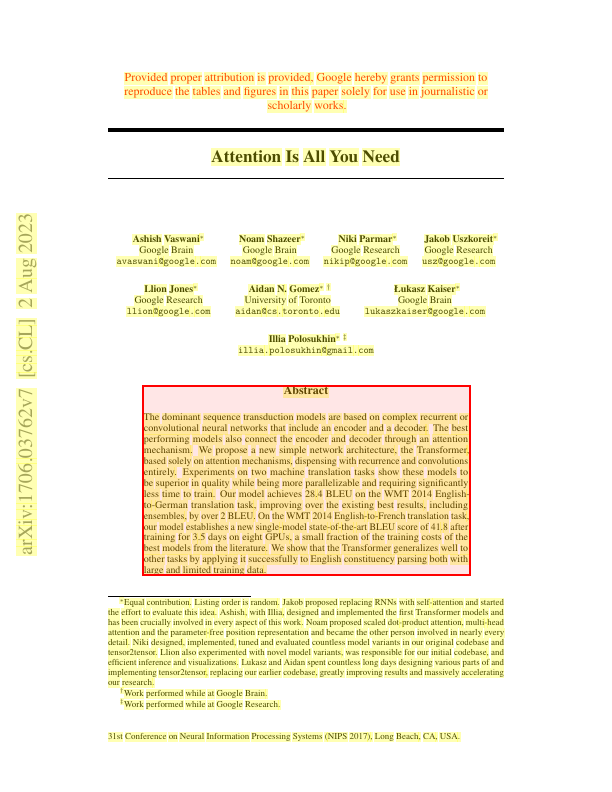

In [39]:
from papermage.visualizers import plot_entities_on_page

page = doc.pages[0]
highlighted = plot_entities_on_page(page.images[0], page.tokens, box_width=0, box_alpha=0.3, box_color="yellow")
highlighted = plot_entities_on_page(highlighted, page.abstracts, box_width=2, box_alpha=0.1, box_color="red")
display(highlighted)

[Box[0.23448856209150323, 0.3441520666666665, 0.5331449376509805, 0.20975945050505046, 0]]


In [ ]:
from papermage.magelib.box import Box

2550 3300
<class 'papermage.magelib.box.Box'>


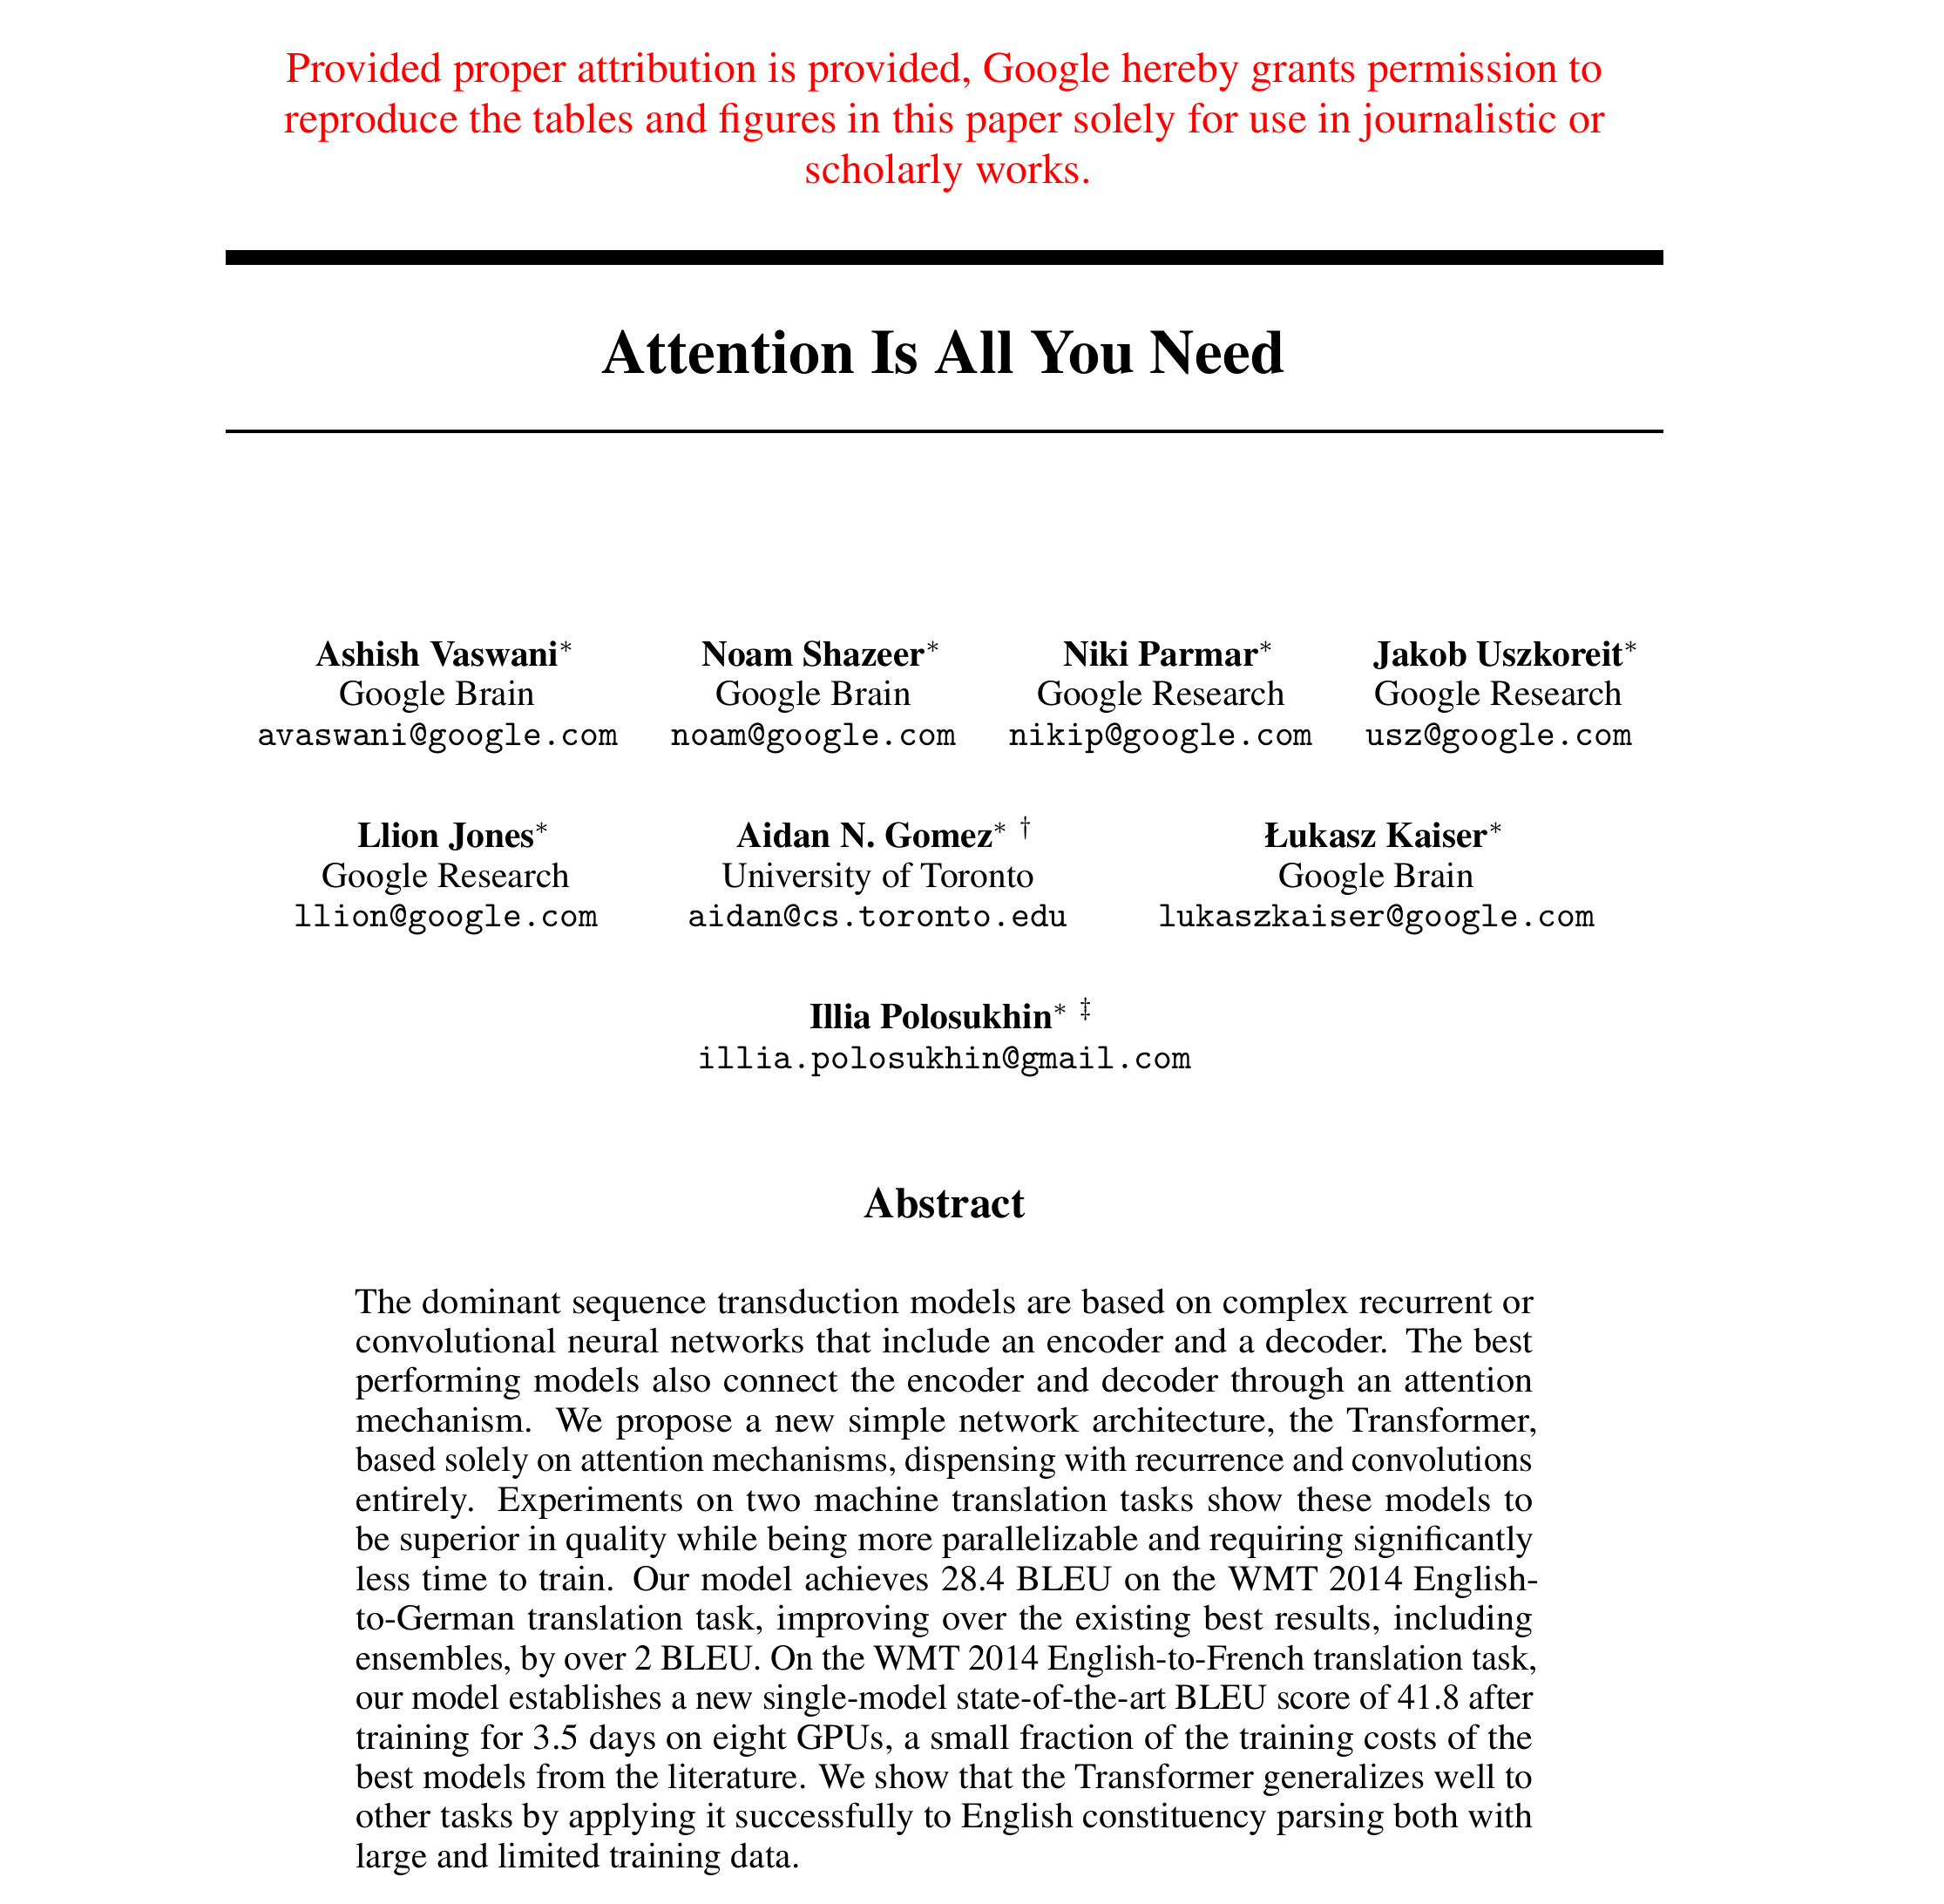

In [40]:
import numpy as np
# Get bounding box starting from top of page and going down until the end of the abstract
# Use this to crop the rasterized image using PIL
from papermage.rasterizers import PDF2ImageRasterizer

rasterizer = PDF2ImageRasterizer()
rasterized_image = rasterizer.rasterize("./paper2.pdf", 300)

# rasterized_image[0].pilimage.crop((0, 0, 100, 100))
im_w, im_h = rasterized_image[0].pilimage.size
print(im_w, im_h)

get_abstract_and_title = True
abstract_bbox = page.abstracts[0].boxes[0] # bbox is (left, top, right, bottom)
print(type(abstract_bbox))
l, t, w, h = abstract_bbox.l, abstract_bbox.t, abstract_bbox.w, abstract_bbox.h

b = t + h + 0.01
r = l + w
if get_abstract_and_title:
    l = t = 0.075
    r = 0.95

# convert from fractions to pixels
bbox = np.array([l, t, r, b]) * np.array([im_w, im_h, im_w, im_h])
bbox = bbox.astype(int)


# Crop the image using the bounding box
cropped_image = rasterized_image[0].pilimage.crop(bbox)
display(cropped_image)
# save the cropped image